## 第4章: 形態素解析
夏目漱石の小説『吾輩は猫である』の文章（neko.txt）をMeCabを使って形態素解析し，その結果をneko.txt.mecabというファイルに保存せよ．このファイルを用いて，以下の問に対応するプログラムを実装せよ．

In [10]:
# 先頭15行の確認
!head -15 ./neko.txt

一

　吾輩は猫である。
名前はまだ無い。

　どこで生れたかとんと見当がつかぬ。
何でも薄暗いじめじめした所でニャーニャー泣いていた事だけは記憶している。
吾輩はここで始めて人間というものを見た。
しかもあとで聞くとそれは書生という人間中で一番獰悪な種族であったそうだ。
この書生というのは時々我々を捕えて煮て食うという話である。
しかしその当時は何という考もなかったから別段恐しいとも思わなかった。
ただ彼の掌に載せられてスーと持ち上げられた時何だかフワフワした感じがあったばかりである。
掌の上で少し落ちついて書生の顔を見たのがいわゆる人間というものの見始であろう。
この時妙なものだと思った感じが今でも残っている。
第一毛をもって装飾されべきはずの顔がつるつるしてまるで薬缶だ。


In [11]:
!mecab -o ./neko.txt.mecab ./neko.txt

### 30. 形態素解析結果の読み込み
形態素解析結果（neko.txt.mecab）を読み込むプログラムを実装せよ．  
ただし，各形態素は表層形（surface），基本形（base），品詞（pos），品詞細分類1（pos1）をキーとするマッピング型に格納し，1文を形態素（マッピング型）のリストとして表現せよ．  
第4章の残りの問題では，ここで作ったプログラムを活用せよ．

In [21]:
filename = './neko.txt.mecab'

sentences = []
morphs = []

with open(filename, 'r') as f:
    # １行ずつ読み取っていく
    for line in f:
        # その１行が文末でない場合...
        if line != 'EOS\n':
            # タブで文章を分ける
            fields = line.split('\t')
            if len(fields) != 2 or fields[0] == '':
                continue
            else:
                attr =  fields[1].split(',')
                morph = {'surface': fields[0], 'base': attr[6], 'pos': attr[0], 'pos1': attr[1]}
                morphs.append(morph)
        else:
            sentences.append(morphs)
            morphs = []

# 確認
for morph in sentences[2]:
    print(morph)



{'surface': '\u3000', 'base': '\u3000', 'pos': '記号', 'pos1': '空白'}
{'surface': '吾輩', 'base': '吾輩', 'pos': '名詞', 'pos1': '代名詞'}
{'surface': 'は', 'base': 'は', 'pos': '助詞', 'pos1': '係助詞'}
{'surface': '猫', 'base': '猫', 'pos': '名詞', 'pos1': '一般'}
{'surface': 'で', 'base': 'だ', 'pos': '助動詞', 'pos1': '*'}
{'surface': 'ある', 'base': 'ある', 'pos': '助動詞', 'pos1': '*'}
{'surface': '。', 'base': '。', 'pos': '記号', 'pos1': '句点'}


### 31. 動詞
動詞の表層形をすべて抽出せよ．

In [25]:
# set型は重複を許さないので、どんどん追加していく
ans = set()
for sentence in sentences:
    for morph in sentence:
        if morph['pos'] == '動詞':
          ans.add(morph['surface'])
# 確認
print(f'動詞の表層形の種類: {len(ans)}\n')
for v in list(ans)[:10]:
  print(v)

動詞の表層形の種類: 3893

除き
恥ずる
張り切れ
すぎる
たべ
勝ち
悟っ
捻る
載っけ
こめ


### 32. 動詞の原形
動詞の基本形をすべて抽出せよ．

In [26]:
# set型は重複を許さないので、どんどん追加していく
ans = set()
for sentence in sentences:
    for morph in sentence:
        if morph['pos'] == '動詞':
          ans.add(morph['base'])
# 確認
print(f'動詞の表層形の種類: {len(ans)}\n')
for v in list(ans)[:10]:
  print(v)

動詞の表層形の種類: 2300

打殺す
調べる
すぎる
あらう
面す
捻る
壊れる
乗り出す
勧める
乗り越す


### 33. 「AのB」
2つの名詞が「の」で連結されている名詞句を抽出せよ．

In [28]:
# set型は重複を許さないので、どんどん追加していく
ans = set()
for sentence in sentences:
    for i in range(1, len(sentence)-1):
        if sentence[i-1]['pos'] == '名詞' and sentence[i]['surface'] == 'の' and sentence[i+1]['pos'] == '名詞':
            ans.add(sentence[i - 1]['surface'] + sentence[i]['surface'] + sentence[i + 1]['surface'])

# 確認
print(f'「名詞+の+名詞」の種類: {len(ans)}\n')
for n in list(ans)[:10]:
  print(n)

「名詞+の+名詞」の種類: 4924

毛の先
以上の感想
以上の思想
渇仰の極致
売薬のよう
無上の名誉
袋の中
向きの六
主人の許
背中の方


### 34. 名詞の連接
名詞の連接（連続して出現する名詞）を最長一致（テキストを解析する際に最長の形態素を優先的に選ぶ手法）で抽出せよ．

In [29]:
ans = set()
for sentence in sentences:
  # 連結するための変数を用意
  nouns = ''
  # いくつ連結したのかを計算
  num = 0

  for morph in sentence:

    # 最初の形態素から順に、名詞であればnounsに連結し、連結数(num)をカウント
    if morph['pos'] == '名詞':
      nouns = ''.join([nouns, morph['surface']])
      num += 1

    # 名詞以外、かつここまでの連結数が2以上の場合は出力し、nounsとnumを初期化
    elif num >= 2:
      ans.add(nouns)
      nouns = ''
      num = 0

    # それ以外の場合、nounsとnumを初期化
    else:
      nouns = ''
      num = 0

  # 連結した名詞なら、それを保存
  if num >= 2:
    ans.add(nouns)

# 確認
print(f'連接名詞の種類: {len(ans)}\n')
for n in list(ans)[:10]:
  print(n)

連接名詞の種類: 4457

食饌
甘木医学士
日露戦争時代
それ天狗
事件以来胸糞
三四冊
鉄気
女客
毎日喧嘩
金田夫婦


### 35. 単語の出現頻度
文章中に出現する単語とその出現頻度を求め，出現頻度の高い順に並べよ．

In [32]:
from collections import defaultdict

# intをデフォルト値とするdefaultdictを生成
# int()は0を返すため、存在しないキーにアクセスしたときのデフォルト値は0となる
ans = defaultdict(int)
for sentence in sentences:
  for morph in sentence:
    if morph['pos'] != '記号':
      # 単語数を増やす
      ans[morph['base']] += 1

# 大きい順にソート
ans = sorted(ans.items(), key=lambda x: x[1], reverse=True)

# 確認
for w in ans[:10]:
  print(w)

('の', 9194)
('て', 6848)
('は', 6420)
('に', 6243)
('を', 6071)
('だ', 5972)
('と', 5508)
('が', 5337)
('た', 4267)
('する', 3657)


### 36. 頻度上位10語
出現頻度が高い10語とその出現頻度をグラフ（例えば棒グラフなど）で表示せよ．

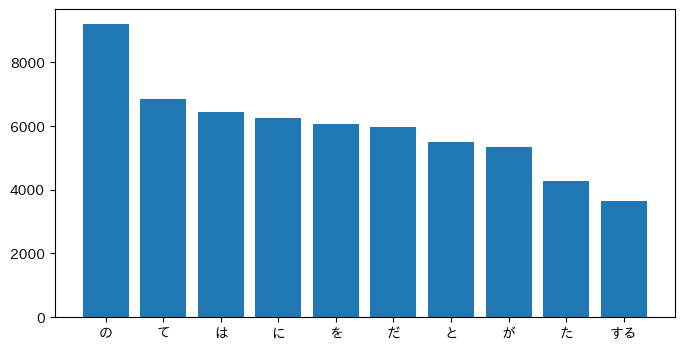

In [34]:
import matplotlib.pyplot as plt
import japanize_matplotlib
from collections import defaultdict

# intをデフォルト値とするdefaultdictを生成
# int()は0を返すため、存在しないキーにアクセスしたときのデフォルト値は0となる
ans = defaultdict(int)
for sentence in sentences:
  for morph in sentence:
    if morph['pos'] != '記号':
      # 単語数を増やす
      ans[morph['base']] += 1

# 大きい順にソート
ans = sorted(ans.items(), key=lambda x: x[1], reverse=True)

# 棒グラフとして表示
keys = [a[0] for a in ans[0:10]]
values = [a[1] for a in ans[0:10]]
plt.figure(figsize=(8, 4))
plt.bar(keys, values)
plt.show()

### 37. 「猫」と共起頻度の高い上位10語
「猫」とよく共起する（共起頻度が高い）10語とその出現頻度をグラフ（例えば棒グラフなど）で表示せよ．

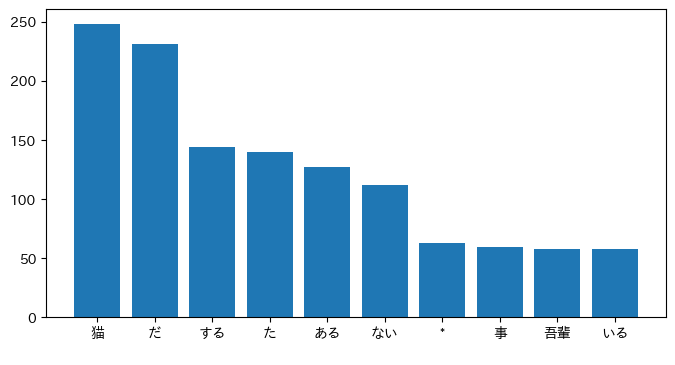

In [37]:
import matplotlib.pyplot as plt
import japanize_matplotlib
from collections import defaultdict

# intをデフォルト値とするdefaultdictを生成
# int()は0を返すため、存在しないキーにアクセスしたときのデフォルト値は0となる
ans = defaultdict(int)
for sentence in sentences:
  if '猫' in [morph['surface'] for morph in sentence]:
    for morph in sentence:
      if morph['pos'] != '記号':
        if morph['pos'] != '助詞':
          # 単語数を増やす
          ans[morph['base']] += 1

# 大きい順にソート
ans = sorted(ans.items(), key=lambda x: x[1], reverse=True)

# 棒グラフとして表示
keys = [a[0] for a in ans[0:10]]
values = [a[1] for a in ans[0:10]]
plt.figure(figsize=(8, 4))
plt.bar(keys, values)
plt.show()

### 38. ヒストグラム
単語の出現頻度のヒストグラム（横軸に出現頻度，縦軸に出現頻度をとる単語の種類数を棒グラフで表したもの）を描け．

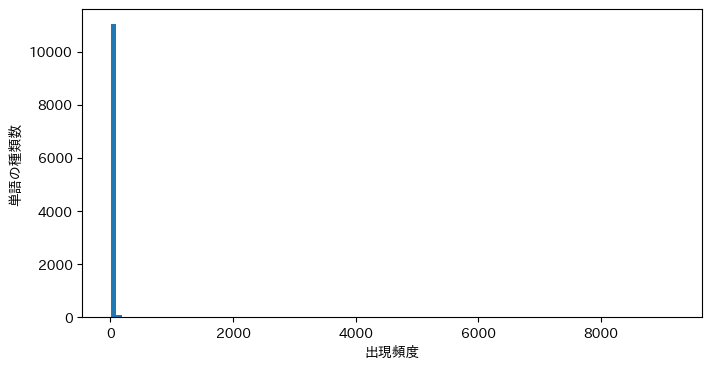

In [38]:
ans = defaultdict(int)
for sentence in sentences:
  for morph in sentence:
    if morph['pos'] != '記号':
      # 単語数を増やす
      ans[morph['base']] += 1

# 個数を算出
ans = ans.values()

plt.figure(figsize=(8, 4))
plt.hist(ans, bins=100)
plt.xlabel('出現頻度')
plt.ylabel('単語の種類数')
plt.show()

### 39. Zipfの法則
単語の出現頻度順位を横軸，その出現頻度を縦軸として，両対数グラフをプロットせよ．

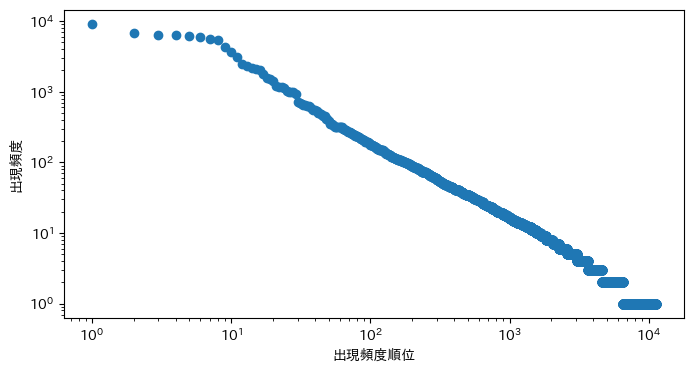

In [39]:
ans = defaultdict(int)
for sentence in sentences:
  for morph in sentence:
    if morph['pos'] != '記号':
      # 単語数を増やす
      ans[morph['base']] += 1

# 大きい順にソート
ans = sorted(ans.items(), key=lambda x: x[1], reverse=True)

ranks = [r + 1 for r in range(len(ans))]
values = [a[1] for a in ans]
plt.figure(figsize=(8, 4))
plt.scatter(ranks, values)
plt.xscale('log')
plt.yscale('log')
plt.xlabel('出現頻度順位')
plt.ylabel('出現頻度')
plt.show()